In [4]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
from sidm.tools import llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm
import coffea.util
import numpy as np

In [5]:
samples = [
    "2Mu2E_200GeV_5p0GeV_20p0mm",
]

In [6]:
fileset = utilities.make_fileset(samples[0:1], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = 1,
                                )

In [7]:
runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    skipbadfiles=True
)

channels = [
    "baseNoLjNoLjsource", "baseNoLj", "base_ljObjCut", "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["muon_base", "dsaMuon_base", "lj_lj_base"],
    unweighted_hist=True,
)

out = {}
for i, sample in enumerate(samples):

    print(f"Processing {sample}")
    fileset_one_sample = {samples[i]:fileset.get(samples[i])}
    
    output = runner.run(fileset_one_sample, treename='Events', processor_instance=p)

    #Add this sample's output to the out variable
    out[sample] = output["out"][sample]

    ##Save output to a file!!
    out_file_name = "output_" + sample + ".coffea"
    # coffea.util.save(output,out_file_name) 

Output()

Processing 2Mu2E_200GeV_5p0GeV_20p0mm


Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 1609) 
with [[], [1], [], [], [2, 3], [...], ..., [0, 2], [2, 3], [1, 2, 3, 4], [2], [1, 2]]: index out of range while 
attempting to get index 3 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 1609) 
with [[], [1], [], [], [2, 3], [...], ..., [0, 2], [2, 3], [1, 2, 3, 4], [2], [1, 2]]: index out of range while 
attempting to get index 3 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

Warning: Unable to apply all for nested dsaMuons collection. Skipping.... cannot slice ListArray (of length 1609) 
with [[], [1], [], [], [2, 3], [...], ..., [0, 2], [2, 3], [1, 2, 3, 4], [2], [1, 2]]: index out of range while 
attempting to get index 3 (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_apply.cpp#L43)

Signal not in xs cfg, assuming 1fb


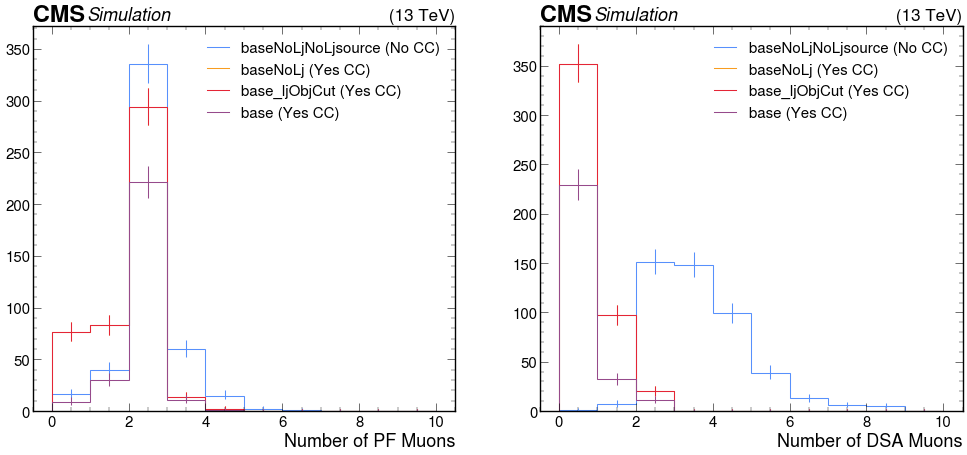

In [8]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
utilities.plot([
    out[samples[0]]["hists"]["muon_n"][channels[0], :],
    out[samples[0]]["hists"]["muon_n"][channels[1], :],
    out[samples[0]]["hists"]["muon_n"][channels[2], :],
    out[samples[0]]["hists"]["muon_n"][channels[3], :],
])
plt.legend(["baseNoLjNoLjsource (No CC)", "baseNoLj (Yes CC)", "base_ljObjCut (Yes CC)", "base (Yes CC)"])

plt.subplot(1,2,2)
utilities.plot([
    out[samples[0]]["hists"]["dsaMuon_n"][channels[0], :],
    out[samples[0]]["hists"]["dsaMuon_n"][channels[1], :],
    out[samples[0]]["hists"]["dsaMuon_n"][channels[2], :],
    out[samples[0]]["hists"]["dsaMuon_n"][channels[3], :],
])
plt.legend(["baseNoLjNoLjsource (No CC)", "baseNoLj (Yes CC)", "base_ljObjCut (Yes CC)", "base (Yes CC)"])

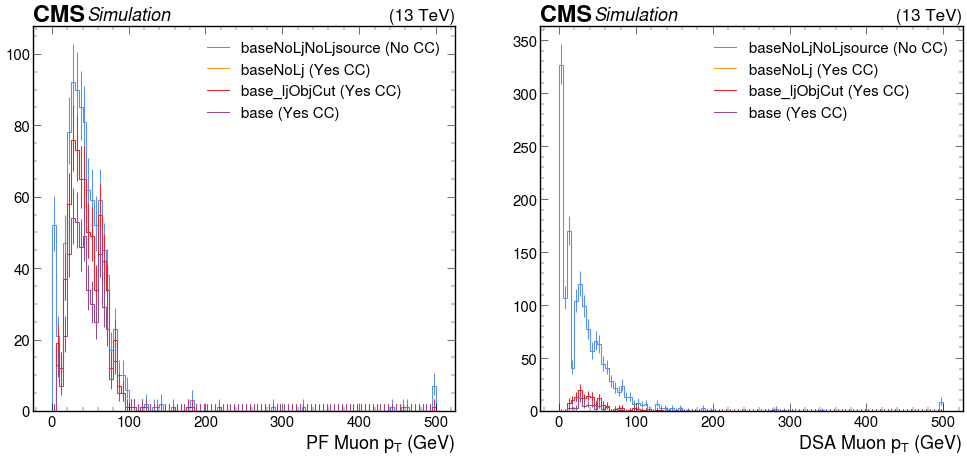

In [9]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
utilities.plot([
    out[samples[0]]["hists"]["muon_pt"][channels[0], :],
    out[samples[0]]["hists"]["muon_pt"][channels[1], :],
    out[samples[0]]["hists"]["muon_pt"][channels[2], :],
    out[samples[0]]["hists"]["muon_pt"][channels[3], :],
])
plt.legend(["baseNoLjNoLjsource (No CC)", "baseNoLj (Yes CC)", "base_ljObjCut (Yes CC)", "base (Yes CC)"])

plt.subplot(1,2,2)
utilities.plot([
    out[samples[0]]["hists"]["dsaMuon_pt"][channels[0], :],
    out[samples[0]]["hists"]["dsaMuon_pt"][channels[1], :],
    out[samples[0]]["hists"]["dsaMuon_pt"][channels[2], :],
    out[samples[0]]["hists"]["dsaMuon_pt"][channels[3], :],
])
plt.legend(["baseNoLjNoLjsource (No CC)", "baseNoLj (Yes CC)", "base_ljObjCut (Yes CC)", "base (Yes CC)"])

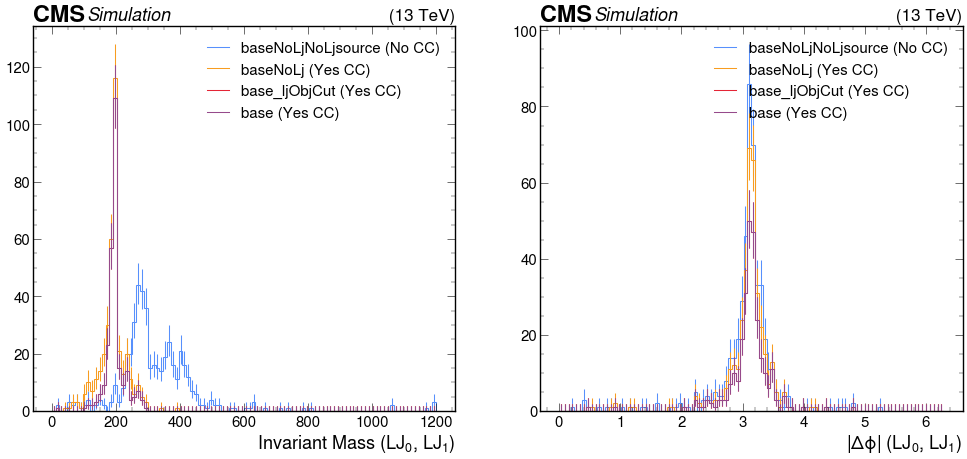

In [10]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
utilities.plot([
    out[samples[0]]["hists"]["lj_lj_invmass"][channels[0], :],
    out[samples[0]]["hists"]["lj_lj_invmass"][channels[1], :],
    out[samples[0]]["hists"]["lj_lj_invmass"][channels[2], :],
    out[samples[0]]["hists"]["lj_lj_invmass"][channels[3], :],
])
plt.legend(["baseNoLjNoLjsource (No CC)", "baseNoLj (Yes CC)", "base_ljObjCut (Yes CC)", "base (Yes CC)"])

plt.subplot(1,2,2)
utilities.plot([
    out[samples[0]]["hists"]["lj_lj_absdphi"][channels[0], :],
    out[samples[0]]["hists"]["lj_lj_absdphi"][channels[1], :],
    out[samples[0]]["hists"]["lj_lj_absdphi"][channels[2], :],
    out[samples[0]]["hists"]["lj_lj_absdphi"][channels[3], :],
])
plt.legend(["baseNoLjNoLjsource (No CC)", "baseNoLj (Yes CC)", "base_ljObjCut (Yes CC)", "base (Yes CC)"])